# Лабораторная работа 4. Обучение с учителем. Задача классификации
* Изучить примеры в тетрадках *.ipynb.

## Задание №1.

### Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

In [1]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

**Формула Байеса**

Формула Байеса позволяет «переставить причину и следствие»: по известному факту события вычислить вероятность того, что оно было вызвано данной причиной. События, отражающие действие «причин», в данном случае называют гипотезами, так как они — предполагаемые события, повлекшие данное.

$P(A|B) =\frac{P(A) \cdot P(B | A)}{P(B)}$

* $P(A)$  -- априорная вероятность гипотезы A;
* $P(A|B)$ --  вероятность гипотезы A при наступлении события B (апостериорная вероятность);
* $P(B|A)$ --  вероятность наступления события B при истинности гипотезы A;
* $P(B)$ -- полная вероятность наступления события B.

In [2]:
import pandas as pd

df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [3]:
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)

p_rain

0.2

In [4]:
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)

p_stroll

0.5333333333333333

In [5]:
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])

p_rain_if_stroll

0.125

$P(yes|rain) =\frac{P(yes) \cdot P(rain | yes)}{P(rain)}$ (4)

* Возможность (Likelihood):  $P(rain | yes) = 1/8$ или 0,125

* Априорная вероятность класса: $P (yes) = 8/15$ или 0,533

* Априорная вероятность предиктора:$P(rain) = 4/15$ или 0,267

In [6]:
p_stroll_if_rain = (p_stroll*p_rain_if_stroll)/p_rain

p_stroll_if_rain

0.3333333333333333

**Вероятность отправиться на прогулку если идёт дождь равна $\frac{1}{3}$**.

## Задание №2.


### Загрузите датасет для классификации (см. файл Excel для Лаб.работы №3), проведите предобработку, выделите целевой признак и предикторы.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [8]:
df = pd.read_csv('../data/neo_task.csv')
df

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [9]:
df.drop(['id','name'], axis=1, inplace=True)
df['hazardous'] = df['hazardous'].astype(int)
df

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90379 non-null  float64
 2   relative_velocity   90279 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90152 non-null  float64
 5   hazardous           90836 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 3.8 MB


In [11]:
df.isna().sum()

est_diameter_min        0
est_diameter_max      457
relative_velocity     557
miss_distance           0
absolute_magnitude    684
hazardous               0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

<Axes: >

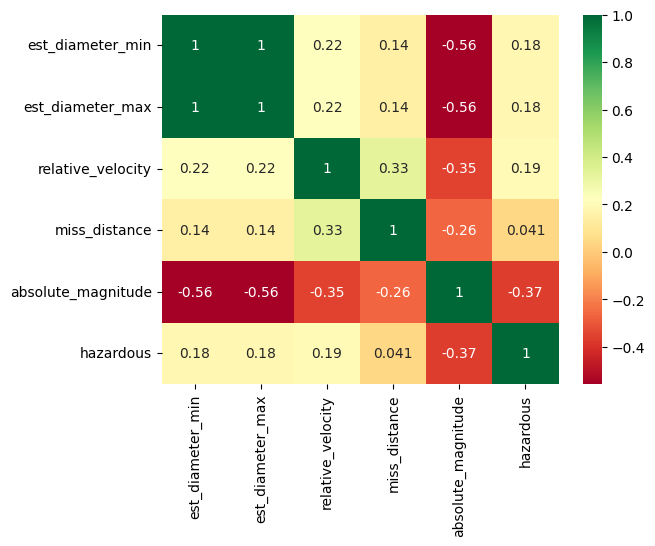

In [14]:
sns.heatmap(df.corr(),  annot=True, cmap="RdYlGn")

In [15]:
iy = 'hazardous'
iX = df.drop(['hazardous'], axis=1).columns

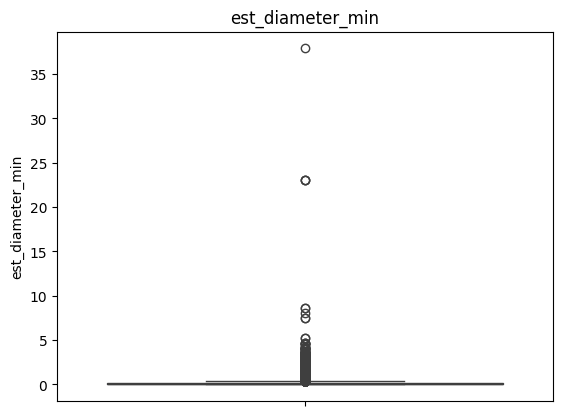

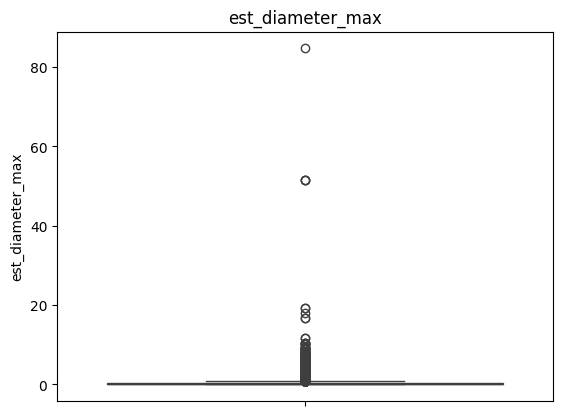

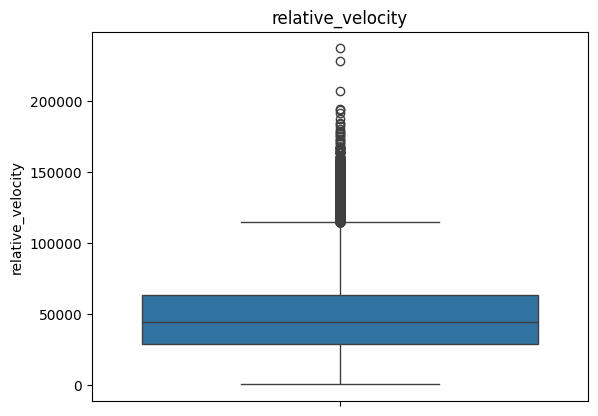

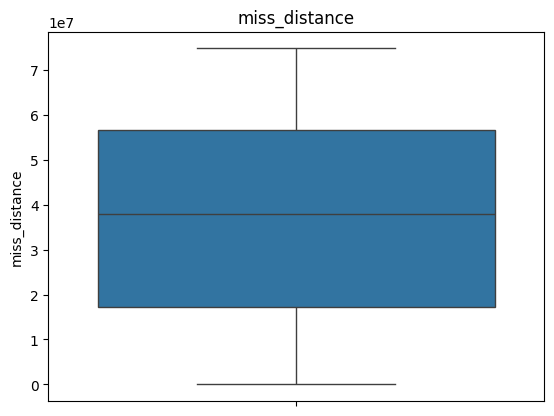

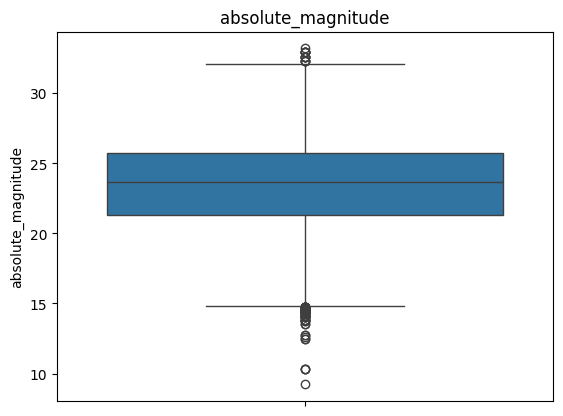

In [16]:
for col in iX:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [17]:
df[iX].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,89144.000000,89144.000000,89144.000000,8.914400e+04,89144.000000
mean,0.127572,0.285260,48068.713998,3.707969e+07,23.527445
std,0.300133,0.671119,25291.925649,2.234658e+07,2.895124
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28624.566850,1.722911e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.787045e+07,23.700000
75%,0.143402,0.320656,62942.592199,5.655836e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [18]:
Q1 = df[iX].quantile(0.25)
Q3 = df[iX].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[iX] = np.clip(df[iX], lower, upper, axis=1)

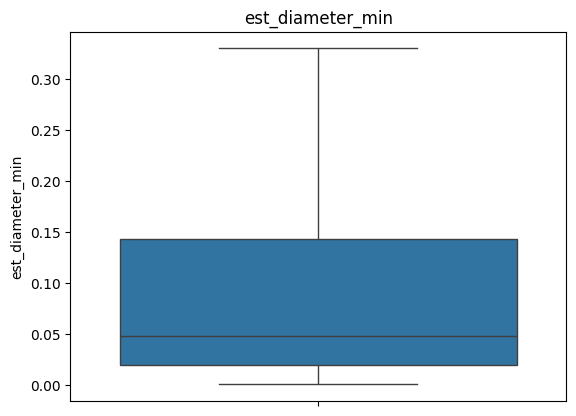

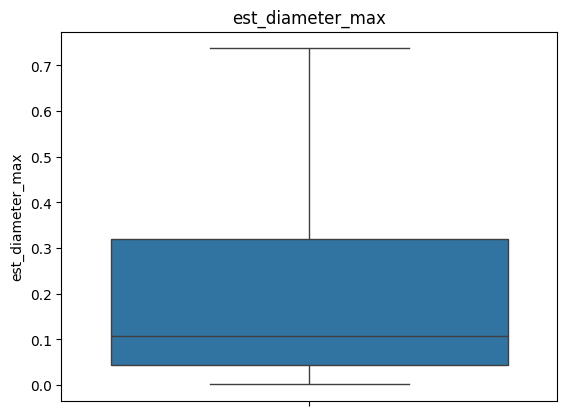

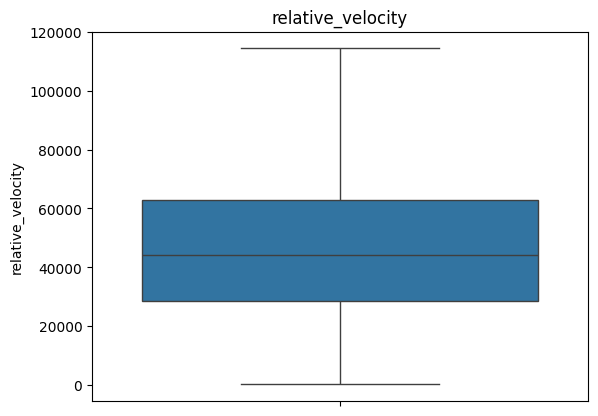

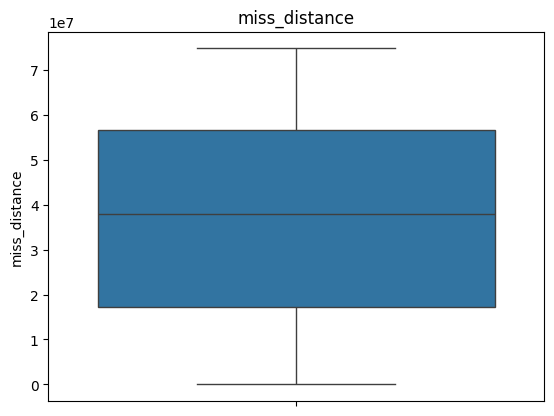

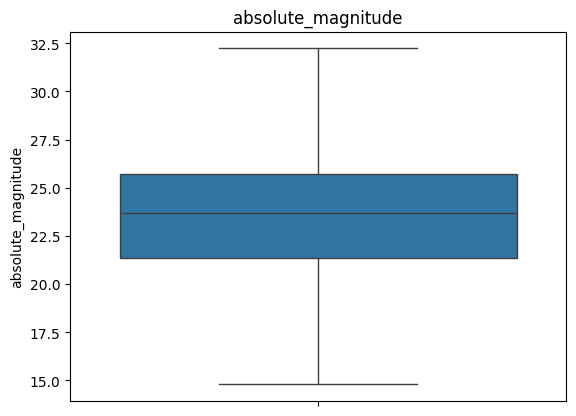

In [19]:
for col in iX:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [20]:
df.to_csv('../data/neo_task_upd.csv', index=False)

In [15]:
y = df['hazardous']
X = df.drop(['hazardous'], axis=1)

In [16]:
y

0        0
1        0
2        0
3        0
4        0
        ..
90831    0
90832    0
90833    0
90834    0
90835    0
Name: hazardous, Length: 89144, dtype: int32

In [17]:
X

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40
...,...,...,...,...,...
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90
90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90


### В случае дисбаланса проведите балансировку.

<Axes: xlabel='hazardous'>

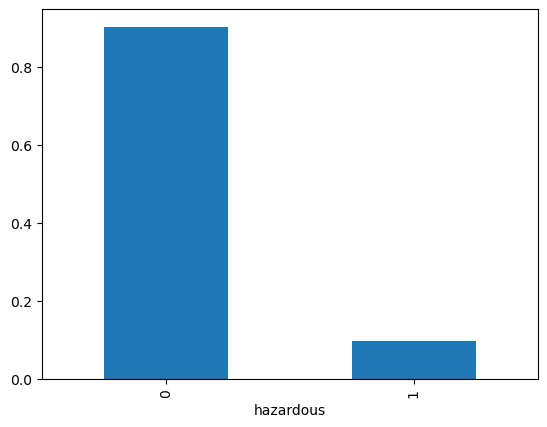

In [22]:
y.value_counts(normalize=True).plot(kind='bar')

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)

X.shape, y.shape

((160952, 5), (160952,))

<Axes: xlabel='hazardous'>

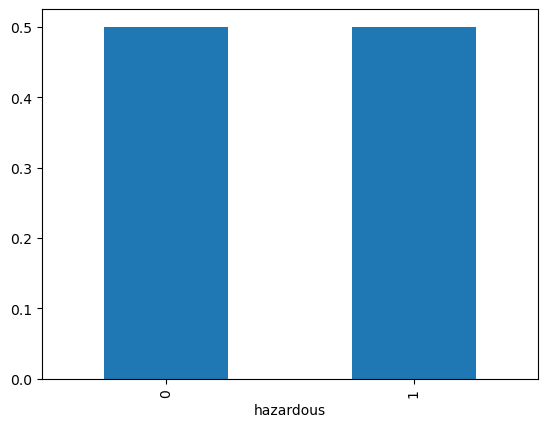

In [24]:
y.value_counts(normalize=True).plot(kind='bar')

### разбейте данные на обучающую и тестовую выборку

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# указав параметр test_size = 0.2 получим, что 20% данных уйдут в тестовую выборку
# также в функцию можно передать параметр shuffle: по умолчанию функция рандомно
# перемешивает данные; поэтому и модели будут получаться разные;
# задайте параметр shuffle = False, если не хотите перемешивать

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((128761, 5), (128761,), (32191, 5), (32191,))

### Масштабируйте числовые признаки.

In [28]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

### Решите задачу классификации на ваших данных с использованием рассмотренных моделей Sklearn. Не забудьте подобрать гиперпараметры.

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def metrics(actual, pred):
  return {
    'Accuracy': accuracy_score(actual, pred),
    'Precision': precision_score(actual, pred),
    'Recall': recall_score(actual, pred),
    'F1-score': f1_score(actual, pred),
    'ROC_AUC': roc_auc_score(actual, pred)
  }
models = {}
classifiers = {}

In [30]:
from sklearn.metrics import roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

#### k-NN

In [31]:
parameters = {'n_neighbors': (15, 17, 19, 21)}
optimal = GridSearchCV(KNeighborsClassifier(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
n_neighbors = optimal.best_params_['n_neighbors']
n_neighbors

21

In [32]:
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

models['KNeighborsClassifier'] = metrics(y_test, y_pred)
classifiers['KNeighborsClassifier'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[13013,  3137],
       [  502, 15539]], dtype=int64)

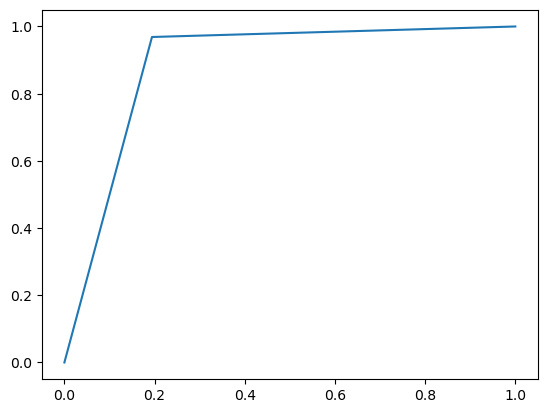

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

#### Naive Bayes

In [34]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)

models['GaussianNB'] = metrics(y_test, y_pred)
classifiers['GaussianNB'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[12667,  3483],
       [ 1687, 14354]], dtype=int64)

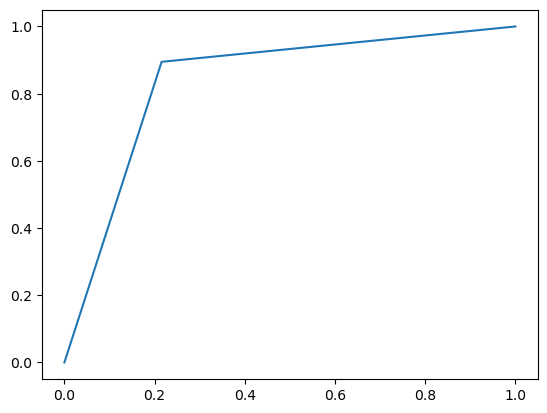

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

#### Logistic Regression

In [36]:
parameters = {'C': (1.0, 3.0, 5.0, 7.0)}
optimal = GridSearchCV(LogisticRegression(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
C = optimal.best_params_['C']
C

5.0

In [37]:
LR = LogisticRegression(C=C)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

models['LogisticRegression'] = metrics(y_test, y_pred)
classifiers['LogisticRegression'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[12074,  4076],
       [  367, 15674]], dtype=int64)

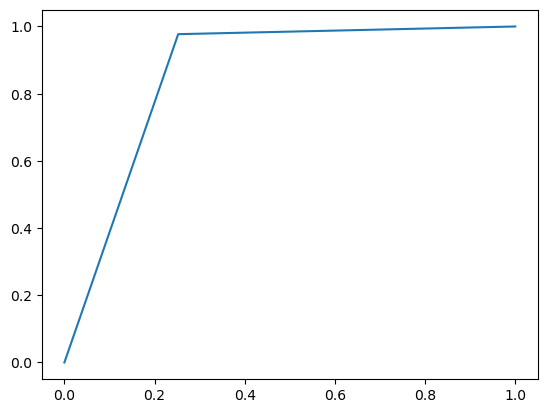

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

#### SVM

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
parameters = {'C': (0.01, 0.1, 1)}
optimal = GridSearchCV(LinearSVC(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
C = optimal.best_params_['C']
C

c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.p

1

In [41]:
SVC_linear = LinearSVC(C=C)
SVC_linear.fit(X_train, y_train)
y_pred = SVC_linear.predict(X_test)

models['SVC_linear'] = metrics(y_test, y_pred)
classifiers['SVC_linear'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


array([[12124,  4026],
       [  458, 15583]], dtype=int64)

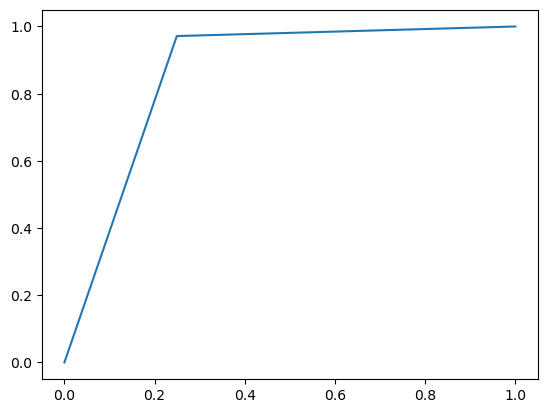

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [47]:
SVC_poly = SVC(kernel='poly')
SVC_poly.fit(X_train, y_train)
y_pred = SVC_poly.predict(X_test)

models['SVC_poly'] = metrics(y_test, y_pred)
classifiers['SVC_poly'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[12406,  3744],
       [  164, 15877]], dtype=int64)

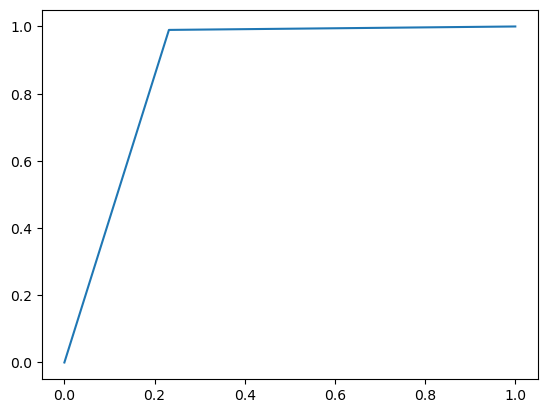

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [43]:
SVC_rbf = SVC(kernel='rbf')
SVC_rbf.fit(X_train, y_train)
y_pred = SVC_rbf.predict(X_test)

models['SVC_rbf'] = metrics(y_test, y_pred)
classifiers['SVC_rbf'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[12437,  3713],
       [  163, 15878]], dtype=int64)

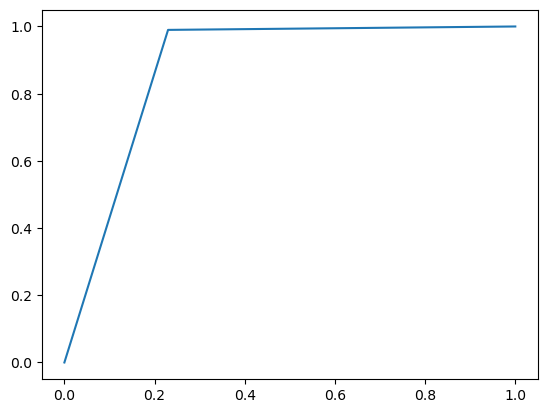

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

In [45]:
SVC_sigmoid = SVC(kernel='sigmoid')
SVC_sigmoid.fit(X_train, y_train)
y_pred = SVC_sigmoid.predict(X_test)

models['SVC_sigmoid'] = metrics(y_test, y_pred)
classifiers['SVC_sigmoid'] = classification_report(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[12413,  3737],
       [ 3627, 12414]], dtype=int64)

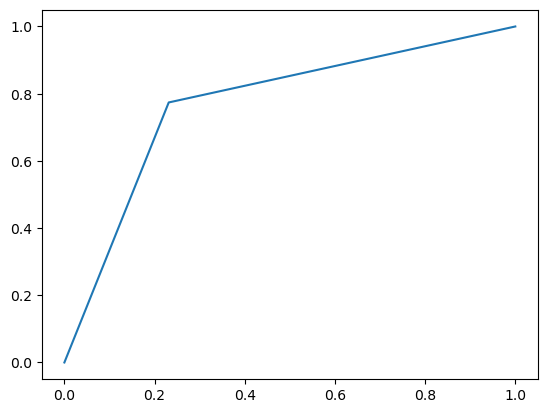

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)

### Вычислите значения метрик Accuracy, Precision, Recall, F1, ROC AUC score.

In [50]:
from pprint import pprint

pprint(models)

{'GaussianNB': {'Accuracy': 0.8393961045012581,
                'F1-score': 0.847393588759667,
                'Precision': 0.804731737399787,
                'ROC_AUC': 0.8395831791714845,
                'Recall': 0.8948319930178916},
 'KNeighborsClassifier': {'Accuracy': 0.8869559814855084,
                          'F1-score': 0.8951810352276982,
                          'Precision': 0.8320304133647461,
                          'ROC_AUC': 0.8872318534374859,
                          'Recall': 0.9687051929430833},
 'LogisticRegression': {'Accuracy': 0.8619800565375415,
                        'F1-score': 0.8758626470341706,
                        'Precision': 0.793620253164557,
                        'ROC_AUC': 0.8623686130914918,
                        'Recall': 0.9771211271117761},
 'SVC_linear': {'Accuracy': 0.8607064086235283,
                'F1-score': 0.8742215988779805,
                'Precision': 0.7946861135193024,
                'ROC_AUC': 0.8610801191914759,
    

### Построить итоговую модель классификаторов (см. Lab4_Ex5 ClassificationModel.ipynb).

In [51]:
[print(f'{k}: \n{val}\n') for k, val in classifiers.items()]
    


KNeighborsClassifier: 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     16150
           1       0.83      0.97      0.90     16041

    accuracy                           0.89     32191
   macro avg       0.90      0.89      0.89     32191
weighted avg       0.90      0.89      0.89     32191


GaussianNB: 
              precision    recall  f1-score   support

           0       0.88      0.78      0.83     16150
           1       0.80      0.89      0.85     16041

    accuracy                           0.84     32191
   macro avg       0.84      0.84      0.84     32191
weighted avg       0.84      0.84      0.84     32191


LogisticRegression: 
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     16150
           1       0.79      0.98      0.88     16041

    accuracy                           0.86     32191
   macro avg       0.88      0.86      0.86     32191
weighted avg   

[None, None, None, None, None, None, None]

## Задание №3.

### Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

In [ ]:
actual = np.random.randint(2, size=10)
pred = np.random.randint(2, size=10)

actual, pred

(array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0]), array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1]))

In [ ]:
score = actual == pred
tn = (~actual & score).sum()
fp = (~actual & ~score).sum()
fn = (actual & ~score).sum()
tp = (actual & score).sum()
# (tn, fp), (fn, tp) = confusion_matrix(actual, pred)
p = tp + fn
n = tn + fp

accuracy = (tp + tn)/(p + n)
precision = tp/(tp + fp)
recall = tp/p
f1 =2/(1/precision + 1/recall)

In [ ]:
accuracy, accuracy_score(actual, pred)

(0.1, 0.1)

In [ ]:
precision, precision_score(actual, pred)

(0.2, 0.2)

In [ ]:
recall, recall_score(actual, pred)

(0.16666666666666666, 0.16666666666666666)

In [ ]:
f1, f1_score(actual, pred)

(0.18181818181818182, 0.1818181818181818)

### Самостоятельно реализуйте kNN.

## Дополнительные баллы
* Самостоятельно реализуйте SVM с возможностью выбирать ядро.